In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import os

In [3]:
#Import true Data
stri="GA-04"
directory="C:/Users/ameya/OneDrive - University of Pittsburgh/Eclipse/DataFiles/OctData/"+stri
#directory="C:/Users/asv26/OneDrive - University of Pittsburgh/Eclipse/DataFiles/OctData/"+stri
Data=np.zeros((2,2))
startindex=0
endindex=startindex+len(os.listdir(directory))
for i in range(startindex,endindex):
    print(i)
    path=os.path.join(directory,"LSdate0_"+str(i)+".txt")
    df=np.loadtxt(path,delimiter="\t")
    Data=np.concatenate((Data,df.T),axis=1)
print(Data)
Data[1]=Data[1]-Data[1][0]
Data[0]=Data[0]/2

index=2
newVData=Data[0][index:-1]
newTData=Data[1][index:-1]-Data[1][index]
newData=np.array([newVData.T,newTData.T])
print(newData)

fsData=1/np.mean(np.diff(newData[1]))
print(fsData)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[ 0.00000000e+00  0.00000000e+00 -9.27150900e-01 ...  2.25677904e+00
   2.25677006e+00  2.25667904e+00]
 [ 0.00000000e+00  0.00000000e+00  1.69729871e+09 ...  1.69730305e+09
   1.69730305e+09  1.69730305e+09]]
[[-4.63575450e-01  1.36967276e+00  1.36929730e+00 ...  1.12841766e+00
   1.12838952e+00  1.12838503e+00]
 [ 0.00000000e+00  2.35009193e-03  4.73713875e-03 ...  4.33954873e+03
   4.33955108e+03  4.33955343e+03]]
425.11793691256446


In [5]:
#Import GA0 Data
directory="C:/Users/ameya/OneDrive - University of Pittsburgh/Eclipse/DataFiles/OctData/GA-07"
GA0Data=np.zeros((2,2))
startindex=13
endindex=startindex+len(os.listdir(directory))
for i in range(startindex,endindex):
    path=os.path.join(directory,"LSdate0_"+str(i)+".txt")
    df=np.loadtxt(path,delimiter="\t")
    GA0Data=np.concatenate((GA0Data,df.T),axis=1)
print(GA0Data)
GA0Data[1]=GA0Data[1]-GA0Data[1][0]
GA0Data[0]=GA0Data[0]/2

index=2
newGA0VData=GA0Data[0][index:-1]
newGA0TData=GA0Data[1][index:-1]-GA0Data[1][index]
newGA0=np.array([newGA0VData.T,newGA0TData.T])
print(newGA0)

[[ 0.00000000e+00  0.00000000e+00 -9.40511980e-01 ...  2.13041437e+00
   2.13039581e+00  2.13037665e+00]
 [ 0.00000000e+00  0.00000000e+00  9.46684810e+08 ...  9.46689115e+08
   9.46689115e+08  9.46689115e+08]]
[[-4.70255990e-01  1.26211557e+00  1.26211647e+00 ...  1.06518653e+00
   1.06520719e+00  1.06519791e+00]
 [ 0.00000000e+00  2.35199928e-03  4.70888615e-03 ...  4.30474453e+03
   4.30474688e+03  4.30474924e+03]]


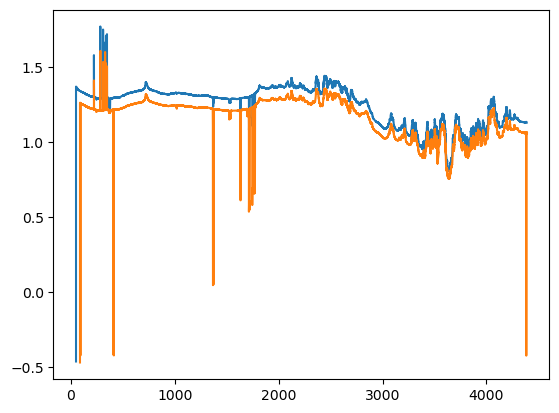

In [12]:
shiftedData1=np.array([newGA0[1],newGA0TData.T])
plt.plot(newData[1]+47.96,newData[0])
plt.plot(newGA0[1]+86.13,newGA0[0])



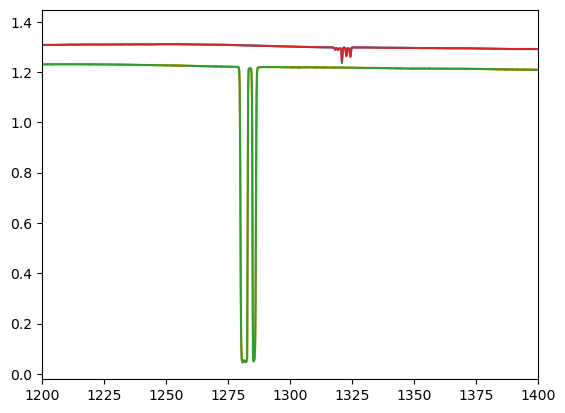

0.0


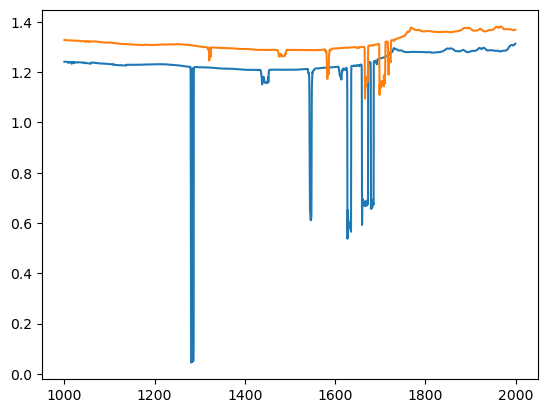

In [7]:
#LineUp
beginGA0=np.where(newGA0[1]<1000)[0][-1]
beginData=np.where(newData[1]<1000)[0][-1]

endGA0=np.where(newGA0[1]<2000)[0][-1]
endData=np.where(newData[1]<2000)[0][-1]

slicedGA0=np.array([newGA0[0][beginGA0:endGA0].T,newGA0[1][beginGA0:endGA0].T])
slicedData=np.array([newData[0][beginData:endData].T,newData[1][beginData:endData].T])


plt.plot(slicedData[1],slicedData[0])
plt.plot(slicedGA0[1],slicedGA0[0])
plt.xlim(1200,1400)

def quickInterpolate(x,t,st):
    result=np.array([])
    for i in st:
        begin=np.where(t<i)[0][-1]
        last=np.where(t>i)[0][0]
        result=np.append(result,(x[last]+x[begin])/2)
    return np.array([result,st])

st=np.linspace(1000,1999,5000)
iGA0=quickInterpolate(slicedGA0[0],slicedGA0[1],st)
iData=quickInterpolate(slicedData[0],slicedData[1],st)

plt.plot(iGA0[1],iGA0[0])
plt.plot(iData[1],iData[0])
plt.show()

def multSignals(a,b,bshift):
    #a and b are the same size. bshift is index to shift b by
    newb=np.concatenate((np.zeros(bshift),(b-np.max(b))**2))
    newa=np.concatenate(((a-np.max(a))**2,np.zeros(bshift)))
    return np.mean(newa*newb)
def findCorrelate(a,b):
    correlate=np.array([])
    for i in range(0,len(st)):
        correlate=np.append(correlate,multSignals(a,b,i))
    return np.argmax(correlate)
timeshift=st[findCorrelate(iGA0[0],iData[0])]-np.min(st)
print(timeshift)
plt.plot(iGA0[1],iGA0[0])
plt.plot(iData[1]+timeshift,iData[0])
#plt.xlim(1300,1490)
plt.show()

shiftedData=np.array([newData[0],newData[1]+timeshift])

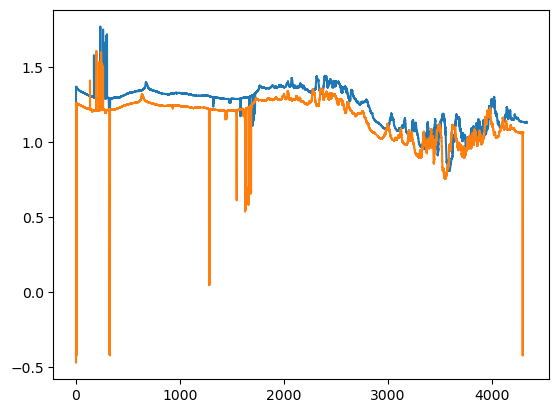

Finished First


In [8]:
plt.plot(shiftedData[1],shiftedData[0])
plt.plot(newGA0[1],newGA0[0])
plt.show()

starttime=2700
endtime=int(np.min(np.array([np.max(newGA0[1]),np.max(shiftedData[1])])))-timeshift
newt=np.linspace(starttime,endtime,500)
iFsData=quickInterpolate(shiftedData[0],shiftedData[1],newt)[0]
print("Finished First")
iFGA0=quickInterpolate(newGA0[0],newGA0[1],newt)[0]



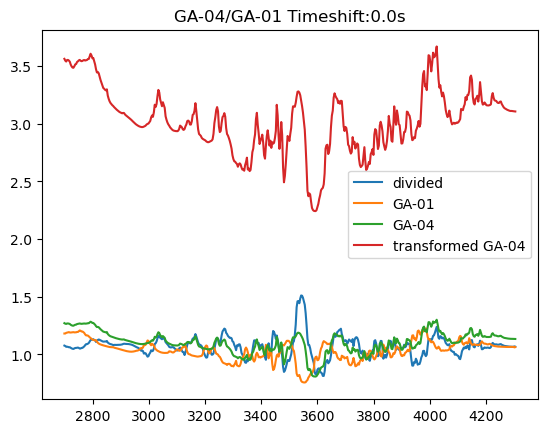

In [9]:
#plt.plot(newt,iFsData)
#plt.plot(newt,iFGA0)
#plt.show()
plt.plot(newt,iFsData/iFGA0,label="divided")
plt.plot(newt,iFGA0,label="GA-01")
plt.plot(newt,iFsData,label=""+stri)

def transform(x,a,b):
    return np.exp(x/a)/b

plt.plot(newt,transform(iFsData,1,1),label="transformed "+stri)

plt.legend()
plt.title(stri+"/GA-01 Timeshift:" + str(round(timeshift,2)) +"s")
plt.show()

GA-04 0.0001437942810888093
GA-04 det 5.447152384709273e-05
GA-04 0.8079312214470589
GA-04 det 3.7878197310740636e-17
GA1: 9.734108018031234e-05
GA1: 0.8475677540117648
425
425


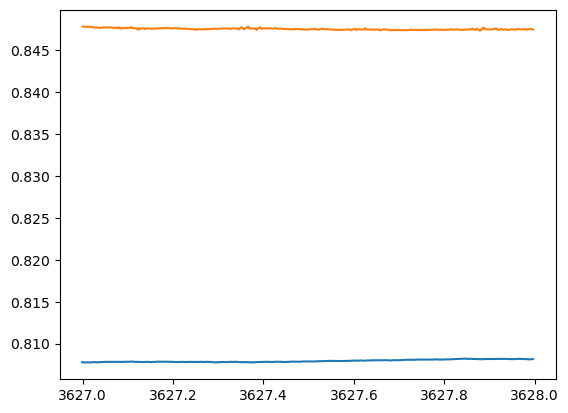

In [16]:
beginsGA0=np.where(newGA0[1]<3627)[0][-1]
beginsData=np.where(shiftedData[1]<3627)[0][-1]

endsGA0=np.where(newGA0[1]<3628)[0][-1]
endsData=np.where(shiftedData[1]<3628)[0][-1]

plt.plot(shiftedData[1][beginsData:endsData],shiftedData[0][beginsData:endsData])
plt.plot(newGA0[1][beginsGA0:endsGA0],newGA0[0][beginsGA0:endsGA0])

#plt.plot(shiftedData[1],shiftedData[0])
#plt.plot(newGA0[1],newGA0[0])


print(stri + " "+str(np.std(newData[0][beginsData:endsData])))
print(stri + " det "+str(np.std(scipy.signal.detrend(newData[0][beginsData:endsData]))))
print(stri + " "+str(np.mean(newData[0][beginsData:endsData])))
print(stri + " det "+str(np.mean(scipy.signal.detrend(newData[0][beginsData:endsData]))))
print("GA0: "+ str((np.std(newGA0[0][beginsGA0:endsGA0]))))
print("GA0: "+ str(np.mean(newGA0[0][beginsGA0:endsGA0])))
print(endsGA0-beginsGA0)
print(endsData-beginsData)

In [17]:
print(stri + " det "+str(np.std(scipy.signal.detrend(newData[0][beginsData:endsData]))))
print(stri + " "+str(np.mean(newData[0][beginsData:endsData])))
print(timeshift)

GA-04 det 5.447152384709273e-05
GA-04 0.8079312214470589
36.17103420684134
